In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r'C:\Users\User\juypter\files\gene_expression.csv')
data.head(5)

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<function matplotlib.pyplot.show(close=None, block=None)>

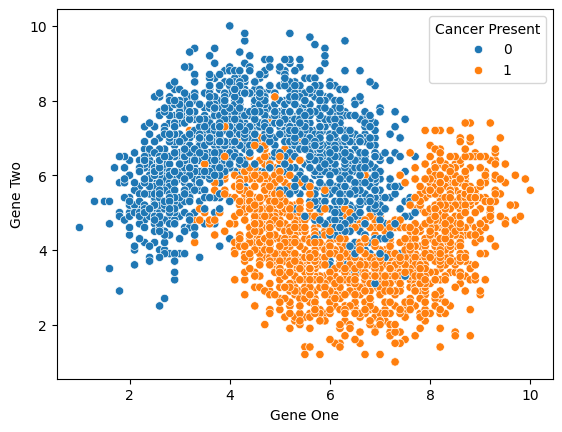

In [3]:
sns.scatterplot(x="Gene One", y="Gene Two",hue='Cancer Present',data=data)
plt.show


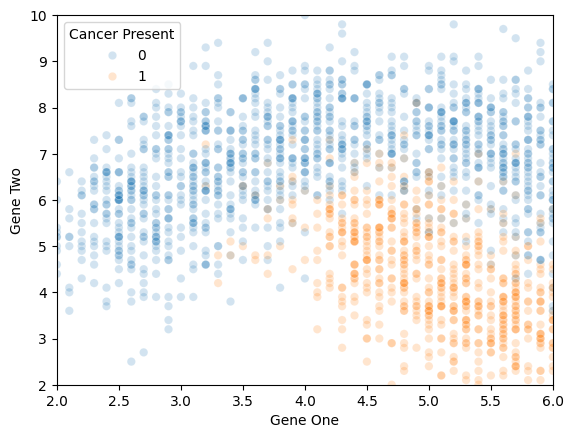

In [4]:
sns.scatterplot(x="Gene One", y="Gene Two",hue='Cancer Present',data=data,alpha=0.2)
plt.xlim(2,6)
plt.ylim(2,10)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = data.iloc[:, :-1]
y= data['Cancer Present']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [6]:
scaler = StandardScaler()


In [7]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.fit_transform(x_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1)

In [9]:
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [11]:
full_test=pd.concat([x_test,y_test],axis=1)

In [12]:
len(full_test)

900

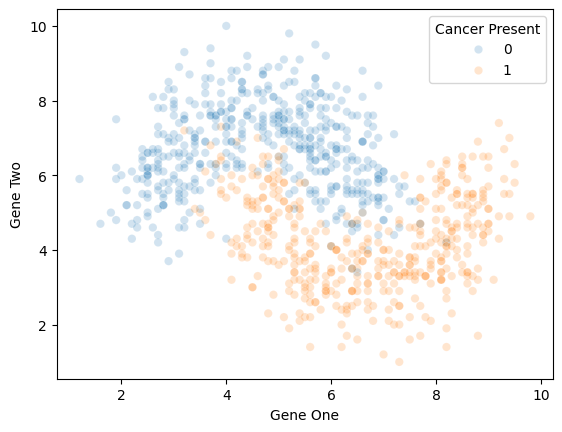

In [13]:
sns.scatterplot(x="Gene One", y="Gene Two",hue='Cancer Present',data=full_test,alpha=0.2)

plt.show()

# Model Evaluation

In [14]:
import warnings
warnings.filterwarnings('ignore')

y_pred = knn_model.predict(scaled_x_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

accuracy_score(y_test,y_pred)


0.9133333333333333

In [16]:

confusion_matrix(y_test, y_pred)

array([[426,  44],
       [ 34, 396]], dtype=int64)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       470
           1       0.90      0.92      0.91       430

    accuracy                           0.91       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.91      0.91      0.91       900



# Elbow Method to choose reasonable k-values

In [18]:
import numpy as np
test_error_rate = []

for i in range(1, 30):
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(scaled_x_train, y_train)
    pred_y = knn.predict(scaled_x_test)
    error_rate=np.mean(pred_y != y_test)

    test_error=1-accuracy_score(y_test,y_pred)
    test_error_rate.append(test_error)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


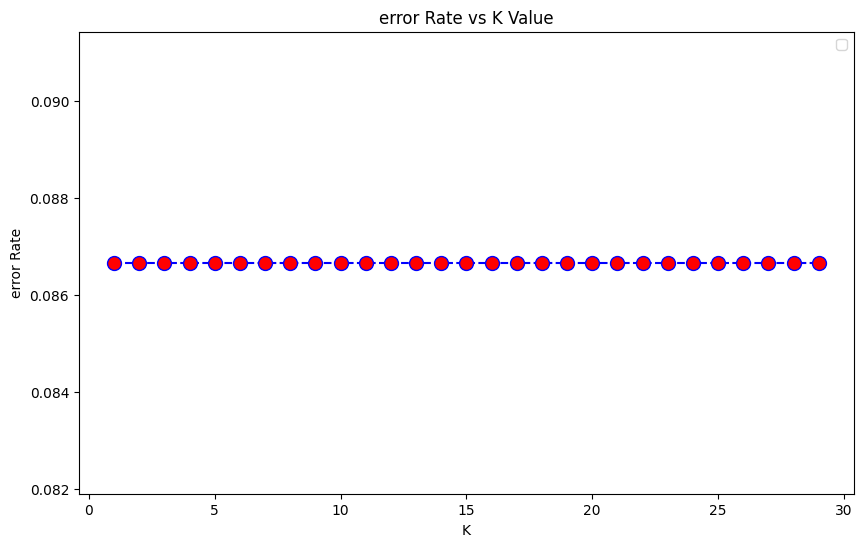

In [19]:
from sympy.abc import x
from sympy.abc import y
plt.figure(figsize=(10,6))
plt.plot(range(1,30),test_error_rate,color='blue',
         linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)

plt.title('error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('error Rate')
plt.legend(loc='best')

 # full cross validation grid search for k-value

scale Data
create model on scale Data

steps:

1. The data split into Training Data and test Data
2. The scaler is fitted on training Data
3. The scaler tranform training Data
4. The models are fitted/trained using Tranformed training Data
5. The scaler is used to transform test Data
6. The trained models predicts using the tranformed test Data


In [20]:
scale = StandardScaler()

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [23]:
operations= [('scaler',scaler),('knn',knn)]

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
from sklearn.model_selection import GridSearchCV


In [26]:
pipe = Pipeline(operations)

# 
Chosen_String_name+two underscore+Parameter Key Name

model_name+_+Parameter Name

knn_model+_n_neighbours

knn_model___n_neighbours

In [27]:
k_value = list(range(1,20))

In [28]:
k_value

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [41]:
param_grid = {'knn_n_neighbours':k_value}

In [44]:
full_cv_classifier =GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

Final model

In [46]:
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=14)
operations= [('scaler',scaler),('knn14',knn)]
pipe = Pipeline(operations)


In [47]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [48]:
pipe_pred = pipe.predict(x_test)

In [49]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [51]:
single_sample = x_test.iloc[40]

In [52]:
single_sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [53]:
pipe.predict(single_sample.values.reshape(1,-1))

array([0], dtype=int64)

In [54]:
pipe.predict_proba(single_sample.values.reshape(1,-1))

array([[0.92857143, 0.07142857]])